In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.데이터 준비 

In [227]:
df = pd.read_csv("./data/mpg.csv")

In [228]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,a,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,usa,ford torino


## 2.데이터탐색

In [229]:
print(df['horsepower'].unique())

['130' 'a' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95' '97'
 '85' '88' '46' '87' '90' '113' '200' '210' '193' nan '100' '105' '165'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [230]:
# Prepocessing
df['horsepower'].replace('a',np.nan,inplace=True)
df.dropna(subset=['horsepower'],inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [231]:
print(df['horsepower'].unique())
print(df.info())
print("\n")

[130. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.  88.
  46.  87.  90. 113. 200. 210. 193. 100. 105. 165. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        391 non-null    int64  
 5   acceleration  391 non-null    float64
 6   model_year    391 non-null    int64  
 7   origin        391 non-null    o

In [232]:
df.dropna(subset=["weight"],inplace=True)
df.dropna(subset=["mpg"],inplace=True)
print(df.mpg.count())
print(df.weight.count())

391
391


In [233]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  391.000000  391.000000    391.000000  391.000000   391.000000   
mean    23.467519    5.465473    194.014066  104.314578  2975.754476   
std      7.803266    1.703152    104.480696   38.418088   849.716985   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.250000    4.000000    105.000000   75.000000  2224.500000   
50%     23.000000    4.000000    151.000000   93.000000  2800.000000   
75%     29.000000    8.000000    264.500000  125.000000  3611.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    391.000000  391.000000  
mean      15.551662   75.994885  
std        2.754789    3.675975  
min        8.000000   70.000000  
25%       13.800000   73.000000  
50%       15.500000   76.000000  
75%       17.050000   79.000000  
max       24.800000   82.000000  


## 3. 데이터 선택

In [234]:
df_mpg_weight = df[['mpg','weight']]
df_mpg_weight.head()

,mpg,weight
0,18.0,3504
2,18.0,3436
3,16.0,3433
4,17.0,3449
5,15.0,4341


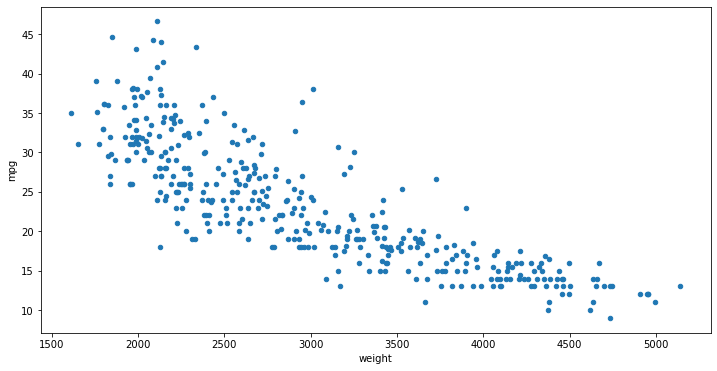

In [235]:
df_mpg_weight.plot(kind = 'scatter' , x = 'weight' , y='mpg', figsize=(12,6))
plt.show()

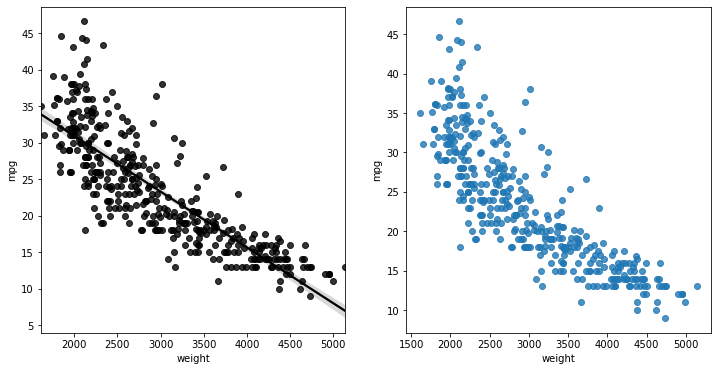

In [236]:
#Seaborn -> Linear Regression
figure = plt.figure(figsize=(12,6))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
sns.regplot(x = 'weight', y='mpg', data=df_mpg_weight, ax=ax1, color='black')
sns.regplot(x = 'weight', y='mpg', data=df_mpg_weight, ax=ax2, fit_reg=False)
plt.show()

## 4.데이터셋 구분

In [237]:
# 8:2
x = df_mpg_weight[['weight']]
y = df_mpg_weight['mpg']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))


273
273
118
118


In [238]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [239]:
lr.fit(x_train,y_train)

LinearRegression()

In [240]:
print(lr.coef_)   # w 
print(lr.intercept_) # b

[-0.00757195]
45.957898665376504


In [241]:
y_predict = lr.predict(x)

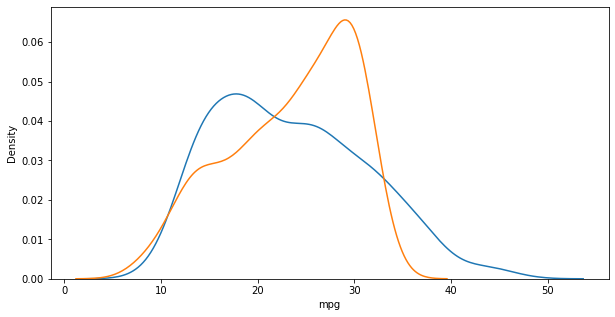

In [242]:
figure = plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False,label='y')
ax2 = sns.distplot(y_predict, hist=False,label='y_predict')
plt.show()

In [243]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 1)
(118, 1)
(273,)
(118,)


In [244]:
from sklearn.preprocessing import PolynomialFeatures

In [245]:
poly = PolynomialFeatures(degree=2)  # y = ax2 + bx + c
poly_x_train= poly.fit_transform(x_train)

In [246]:
print(poly_x_train.shape)

(273, 3)


In [247]:
pr = LinearRegression()
pr.fit(poly_x_train, y_train)  # 학습

LinearRegression()

In [248]:
poly_x_test = poly.fit_transform(x_test)
# r_square 
r_square = pr.score(poly_x_test, y_test)
print(r_square)

0.6931324856610599


In [249]:
y_test_hat = pr.predict(poly_x_test)

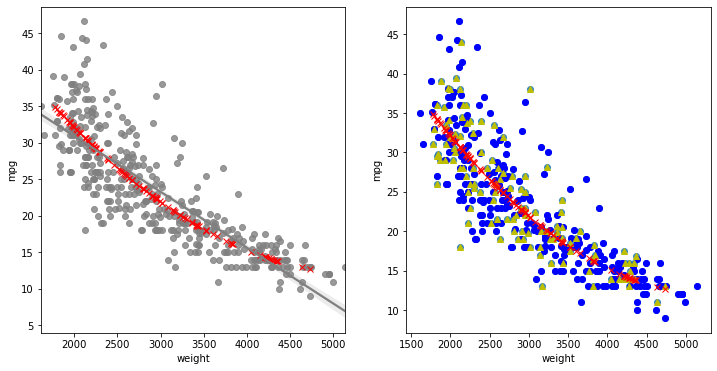

In [250]:
figure = plt.figure(figsize=(12,6))
ax1 = figure.add_subplot(1,2,1)
ax1.plot(x_test,y_test_hat,'rx')
sns.regplot(x = 'weight', y='mpg', data=df_mpg_weight, ax=ax1, color='gray')

ax3 = figure.add_subplot(1,2,2)
ax3.plot(x_train,y_train,'ob')
ax3.plot(x_test,y_test,'^y')
ax3.plot(x_test,y_test_hat,'rx')
sns.regplot(x = 'weight', y='mpg', data=df_mpg_weight, ax=ax3, fit_reg=False)
plt.show()

In [251]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)

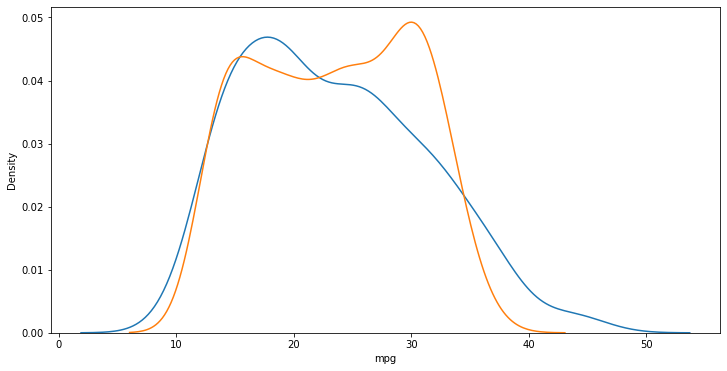

In [252]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y, hist=False,label='y')
ax2 = sns.distplot(y_hat, hist=False,label='y_hat')
plt.show()